# Exercise 14.1

In [3]:
import numpy as np
import sympy as sy

In [4]:
def Newton_Cotes(g, a, b, N, method):
    if method == 'midpoint':
        x = np.array([a + (2 * i + 1) * (b - a) / (2 * N) for i in range(N)])
        return ((b - a) / N) * np.sum(g(x))
    elif method == 'trapezoid':
        x = np.array([a + i * (b - a) / N for i in range(N+1)])
        return ((b - a) / (2 * N)) * (g(x[0]) + 2 * np.sum(g(x[1:-1])) + g(x[N]))
    elif method == 'Simpsons':
        x = np.array([a + i * (b - a) / (2 * N) for i in range(2*N+1)])
        g_odd = g(x[1:(2*N):2])
        g_even = g(x[2:(2*N-1):2])
        return ((b - a) / (3 * (2 * N + 1))) * (g(x[0]) + 4 * np.sum(g_odd) 
                                            + 2 * np.sum(g_even) + g(x[2*N]))

In [5]:
g = lambda x: 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 2 * x + 1
a = -10
b = 10
N = 100

midpoint = Newton_Cotes(g, a, b, N, 'midpoint')
trapezoid = Newton_Cotes(g, a, b, N, 'trapezoid')
Simpsons = Newton_Cotes(g, a, b, N, 'Simpsons')

In [6]:
print(midpoint, trapezoid, Simpsons)

4371.96476 4376.070559999999 4351.5754825870645


# Exercise 14.2

In [7]:
from scipy.stats import norm

In [8]:
def normal_dist(μ, σ, N, k):
    Z = np.linspace(μ - k * σ, μ + k * σ, N)
    w = np.empty_like(Z)
    w[0] = norm.cdf((Z[0] + Z[1]) / 2, loc=μ, scale=σ)
    w[N - 1] = 1 - norm.cdf((Z[N - 1] + Z[N - 2]) / 2, loc=μ, scale=σ)
    for i in range(1, N - 1):
        Z_min = ((Z[i - 1] + Z[i]) / 2)
        Z_max = ((Z[i + 1] + Z[i]) / 2)
        w[i] = norm.cdf(Z_max, loc=μ, scale=σ) - norm.cdf(Z_min, loc=μ, scale=σ)
    return w, Z

In [9]:
w, Z = normal_dist(0, 1, 11, 3)
print(w)
print(Z)

[0.00346697 0.01439745 0.04894278 0.11725292 0.19802845 0.23582284
 0.19802845 0.11725292 0.04894278 0.01439745 0.00346697]
[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


# Exercise 14.3

In [10]:
def lognormal_dist(μ, σ, N, k):
    w, logA = normal_dist(μ, σ, N, k)
    A = np.exp(logA)
    return w, A

In [11]:
w, A = lognormal_dist(0, 1, 11, 3)
print(w)
print(A)

[0.00346697 0.01439745 0.04894278 0.11725292 0.19802845 0.23582284
 0.19802845 0.11725292 0.04894278 0.01439745 0.00346697]
[ 0.04978707  0.09071795  0.16529889  0.30119421  0.54881164  1.
  1.8221188   3.32011692  6.04964746 11.02317638 20.08553692]


# Exercise 14.4

In [12]:
μ = 10.5
σ = 0.8
w, A = lognormal_dist(μ, σ, 19, 3)
np.sum(w * A)

50009.69075006097

In [13]:
np.exp(μ + σ ** 2 / 2)

50011.087008521754

# Exercise 14.5

In [14]:
from scipy.optimize import root

In [15]:
g = lambda x: 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 2 * x + 1
a = -10
b = 10
N = 100

In [16]:
def gaussian_quad(params):
    a = -10
    b = 10
    w1, w2, w3, x1, x2, x3 = params
    w = np.array([w1, w2, w3])
    x = np.array([x1, x2, x3])
    equations = np.empty(6)
    for n in range(1, 7):
        equations[n - 1] = (b ** n - a ** n) / n - w @ (x ** (n - 1))
    return equations

In [17]:
optimal = root(gaussian_quad, np.ones(6))
w = optimal.x[:3]
x = optimal.x[3:]

In [18]:
np.sum(w * g(x))

4373.333333340381

# Exercise 14.6

In [19]:
from scipy.integrate import quad

In [20]:
quad(g, a, b)[0]

4373.333333333334

# Exercise 14.7

In [21]:
def monte_carlo(g, Ω, N):
    x_min, x_max = Ω
    x = np.random.uniform(x_min, x_max, (2, N))
    return (4 / N) * np.sum(g(x[0], x[1]))

In [22]:
g = lambda x, y: np.sum(x ** 2 + y ** 2 <= 1)

In [23]:
Ω = np.array([-1, 1])
monte_carlo(g, Ω, 1000000)

3.1422079999999997

# Exercise 14.8

In [24]:
from matplotlib import pyplot as plt

In [25]:
def d_primes(d):
    primes = []
    n = 2
    while (len(primes) < d):
        not_prime = [n for p in primes if n%p == 0]
        if not not_prime:
            primes += [n]
        n += 1
    return primes

In [26]:
d_primes(10)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

In [42]:
def equidistributed_sequence(N, d, method):
    primes = np.array(d_primes(d))
    n = np.arange(N)
    s = np.arange(d)
    if method == "weyl":
        return np.outer(n, primes ** (1/2)) % 1
    elif method == "haber":
        return np.outer(n * (n + 1) / 2, primes ** (1/2)) % 1
    elif method == "niederreiter":
        return np.outer(n * 2 ** (1/(n+1)), 2 ** (s / (n+1))) % 1
    elif method == "baker":
#         r = np.arange(N * d)
#         return np.outer(n, np.exp())
        return

In [44]:
x = equidistributed_sequence(1000, 2, 'weyl')

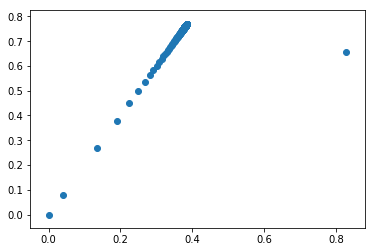

In [35]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

# Exercise 14.9

In [31]:
def quasi_monte_carlo(g, N):
    x = equidistributed_sequence(N, 2, 'weyl')
    x = 2 * x - 1
    return (4 / N) * np.sum(g(x[:, 0], x[:, 1]))

In [32]:
quasi_monte_carlo(g, 1000000)

3.141364